In [60]:
#import required modules 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib notebook
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [42]:
#define the column names to be used in dataframe
col_name = ["project_id",	"name",	"category_id",	"category_name",	"sub_category_id",
            "sub_category_name", "country_id",	"country",	"currency_id",	"currency",
            "launched",	"deadline",	"goal",	"pledged", "backers",	"outcome"]
#import the data from csv file 
df_campaign = pd.read_csv(r'E:\Machine Learning Engineer\BrainStation\Kickstarter_data.csv', 
                          header = None, error_bad_lines=False, encoding = "ISO-8859-1")
#while exporting data from sql to csv some of the rows had more/less number of fields as expected. The rows
#with more number of rows are skipped by using the erro_bad_lines parameter. while the rows with less number
#of fields were dropped later using the nan function

#update the column names with col_name 
df_campaign.columns = col_name
df_campaign.head()

b'Skipping line 112: expected 16 fields, saw 17\nSkipping line 390: expected 16 fields, saw 17\nSkipping line 912: expected 16 fields, saw 17\nSkipping line 1140: expected 16 fields, saw 17\nSkipping line 1445: expected 16 fields, saw 17\nSkipping line 1828: expected 16 fields, saw 17\nSkipping line 1941: expected 16 fields, saw 18\nSkipping line 1958: expected 16 fields, saw 17\nSkipping line 2011: expected 16 fields, saw 17\nSkipping line 2581: expected 16 fields, saw 17\nSkipping line 2588: expected 16 fields, saw 17\nSkipping line 3445: expected 16 fields, saw 17\nSkipping line 3637: expected 16 fields, saw 17\nSkipping line 4012: expected 16 fields, saw 17\nSkipping line 4105: expected 16 fields, saw 17\nSkipping line 4240: expected 16 fields, saw 17\nSkipping line 4642: expected 16 fields, saw 17\nSkipping line 4644: expected 16 fields, saw 17\nSkipping line 5125: expected 16 fields, saw 17\nSkipping line 5434: expected 16 fields, saw 17\nSkipping line 5470: expected 16 fields, s

,project_id,name,category_id,category_name,sub_category_id,sub_category_name,country_id,country,currency_id,currency,launched,deadline,goal,pledged,backers,outcome
0,1,Ragdolls,2,Film & Video,23,Webseries,2,US,2,USD,2013-04-25 00:00:00,2013-05-25 00:00:00,15000.00,20.00,3,failed
1,2,One To Ten,2,Film & Video,47,Shorts,1,GB,1,GBP,2015-11-16 00:00:00,2015-12-16 00:00:00,223.68,413.81,23,successful
2,3,Future Gun - A short film about kids and advan...,2,Film & Video,24,Animation,2,US,2,USD,2013-08-28 00:00:00,2013-09-27 00:00:00,5000.00,1497.00,28,failed
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,9,Fashion,52,Apparel,2,US,2,USD,2014-07-22 00:00:00,2014-08-21 00:00:00,6000.00,8795.00,218,successful
4,5,The Rich Lifestyle,2,Film & Video,9,Documentary,2,US,2,USD,2016-08-24 00:00:00,2016-09-28 00:00:00,2000000.00,2.00,2,failed


In [43]:
df_campaign.count()
# dataframe have less number of rows than in sql data (15000) as some of the rows were skipped by error_bad_lines parameter.

project_id           14954
name                 14954
category_id          14954
category_name        14954
sub_category_id      14954
sub_category_name    14954
country_id           14954
country              14954
currency_id          14954
currency             14954
launched             14954
deadline             14954
goal                 14954
pledged              14954
backers              14954
outcome              14793
dtype: int64

In [44]:
#let's see the data where outcome is nan (due to less nuber of fields than expected)
df_campaign[df_campaign['outcome'].isna()]

,project_id,name,category_id,category_name,sub_category_id,sub_category_name,country_id,country,currency_id,currency,launched,deadline,goal,pledged,backers,outcome
90,91,Metro760 LGBT Newspaper for the Palm Springs C...,1,Publishing,46,Publishing,11,"N,0"",2""",USD,2015-02-06 00:00:00,2015-02-28 00:00:00,7500,0.00,0.0,undefined,NaN
468,471,Chronicles: Arcane Tales,1,Publishing,46,Publishing,11,"N,0"",2""",USD,2015-02-24 00:00:00,2015-03-31 00:00:00,6500,0.00,0.0,undefined,NaN
586,589,Boketto Makes Their First Record!,3,Music,3,Music,11,"N,0"",2""",USD,2016-04-15 00:00:00,2016-05-15 00:00:00,5500,6758.00,0.0,successful,NaN
612,615,Joe Applehead,3,Music,3,Music,11,"N,0"",2""",USD,2015-06-09 00:00:00,2015-07-04 00:00:00,7500,0.00,0.0,undefined,NaN
655,658,Chasing Tails - The Amberland Music Video,3,Music,3,Music,11,"N,0"",1""",GBP,2014-12-02 00:00:00,2014-12-22 00:00:00,2330.39,2431.37,0.0,undefined,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14198,14244,Anchor for My Soul by Whitney Bozarth,3,Music,3,Music,11,"N,0"",2""",USD,2015-06-22 00:00:00,2015-07-22 00:00:00,7500,7681.00,0.0,undefined,NaN
14218,14264,Get Out The Music 2015 Summer Tour,3,Music,3,Music,11,"N,0"",2""",USD,2015-02-17 00:00:00,2015-03-19 00:00:00,8000,8539.00,0.0,undefined,NaN
14684,14730,GoldKiller Productions Inc,3,Music,3,Music,11,"N,0"",2""",USD,2014-07-29 00:00:00,2014-09-07 00:00:00,1500,2062.00,0.0,undefined,NaN
14825,14872,Whisper Violet - Honors Senior Thesis Film,2,Film & Video,4,Film & Video,11,"N,0"",2""",USD,2016-04-14 00:00:00,2016-05-14 00:00:00,2000,2300.00,0.0,successful,NaN


In [45]:
#Drop the columns with nan vales as there are only 161 such columns and they would not affect 
#our final results considerably.
df_campaign.dropna(axis = 0, how = 'any', inplace = True)


In [48]:
#number of rows in final data frame
df_campaign.count()

project_id           14793
name                 14793
category_id          14793
category_name        14793
sub_category_id      14793
sub_category_name    14793
country_id           14793
country              14793
currency_id          14793
currency             14793
launched             14793
deadline             14793
goal                 14793
pledged              14793
backers              14793
outcome              14793
dtype: int64

In [56]:
#let's see different types of campaign outcomes
outcome_success = df_campaign[['outcome', 'goal']].groupby(['outcome']).count().reset_index()
outcome_success.columns = ['Outcome', 'Campaigns']
outcome_success['Sucess%'] = (outcome_success['Campaigns']/outcome_success['Campaigns'].sum())*100
outcome_success

,Outcome,Campaigns,Sucess%
0,canceled,1506,10.180491
1,failed,7813,52.815521
2,live,110,0.743595
3,successful,5296,35.800717
4,suspended,68,0.459677


<IPython.core.display.Javascript object>


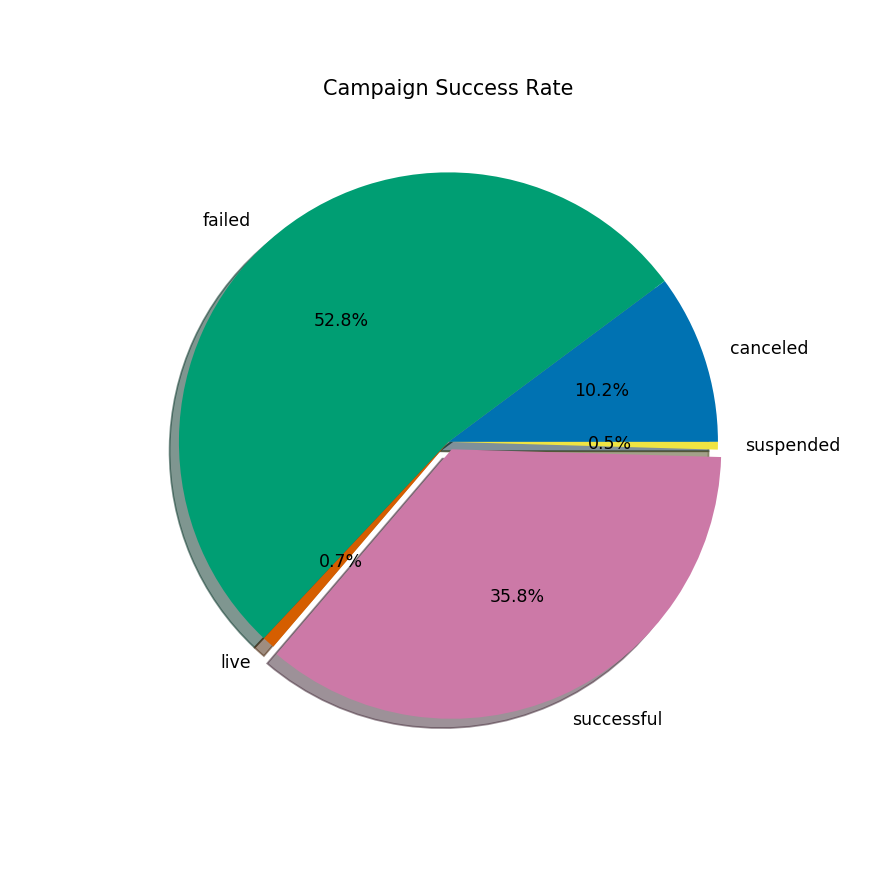

In [66]:
#plot success rate using a pie chart in matplotlib
plt.figure(figsize = (7,7))
plt.pie(x = outcome_success['Sucess%'], labels = outcome_success['Outcome'], explode = [0,0,0,0.03,0],
        shadow = True, autopct = '%1.1f%%')
plt.title("Campaign Success Rate", loc = 'center')
plt.show()

In [92]:
#change the object data type columns to integer and datetime
df_campaign.backers = df_campaign.backers.astype('int64')
df_campaign.launched = pd.to_datetime(df_campaign.launched)
df_campaign.deadline = pd.to_datetime(df_campaign.deadline)

,goal,pledged,backers
category_name,,,
Art,5.900605e+07,4962807.82,44559
Comics,3.296036e+06,2707016.88,55652
Crafts,3.965155e+06,574123.39,10418
Dance,6.397418e+05,488335.88,6022
Design,4.758618e+07,23997648.10,262199
Fashion,3.194269e+07,5481402.42,54327
Film & Video,3.159940e+08,19225856.58,220396
Food,2.399247e+07,4647020.74,45797
Games,3.828546e+07,27791369.86,411667


In [94]:
#select the dataframe where campaign outcome is successful only.
df_ScsfCamp = df_campaign[df_campaign.outcome == 'successful']
df_ScsfCamp

,project_id,name,category_id,category_name,sub_category_id,sub_category_name,country_id,country,currency_id,currency,launched,deadline,goal,pledged,backers,outcome
1,2,One To Ten,2,Film & Video,47,Shorts,1,GB,1,GBP,2015-11-16,2015-12-16,223.68,413.81,23,successful
3,4,Fourth Wave ApparelVintage Fashion for the Mo...,9,Fashion,52,Apparel,2,US,2,USD,2014-07-22,2014-08-21,6000.00,8795.00,218,successful
14,15,Too Sweet - The Not So Serious Side to Diabetes,1,Publishing,10,Nonfiction,2,US,2,USD,2014-01-16,2014-02-15,2500.00,2525.00,6,successful
15,16,Baby Hungry Short Film Finishing Funds,2,Film & Video,47,Shorts,2,US,2,USD,2010-10-27,2010-11-26,1500.00,1525.00,23,successful
16,17,"Turn solvents-forgive yr. blood"" into 12 inche...",3,Music,3,Music,2,US,2,USD,2011-04-20,2011-05-20,1000.00,1494.00,43,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14943,14990,"Leading Light"" an evening length dance premier...",14,Dance,81,Performances,2,US,2,USD,2015-08-27,2015-09-26,3500.00,4478.00,72,successful
14945,14992,Cleft-Lip Repair In Thailand: A Study to Impro...,1,Publishing,127,Academic,2,US,2,USD,2014-06-04,2014-06-24,3500.00,3835.63,54,successful
14948,14995,Montage Arts Journal,1,Publishing,56,Periodicals,2,US,2,USD,2012-02-02,2012-03-19,2500.00,2685.69,52,successful
14949,14996,A Doctor in Spite of Himself by Monsieur Moliere,10,Theater,20,Theater,2,US,2,USD,2010-12-17,2011-02-15,2000.00,2100.00,39,successful


In [23]:
['project_id', 'name', 'category_id', 'category_name', 'sub_category_id',
       'sub_category_name', 'country_id', 'country', 'currency_id', 'currency',
       'launched', 'deadline', 'goal', 'pledged', 'backers', 'outcome']

Index(['project_id', 'name', 'category_id', 'category_name', 'sub_category_id',
       'sub_category_name', 'country_id', 'country', 'currency_id', 'currency',
       'launched', 'deadline', 'goal', 'pledged', 'backers', 'outcome'],
      dtype='object')

In [96]:
#group by category to understand the goal, backers and pledged amount by categories.
df_category = df_ScsfCamp[['category_name', 'goal', 'pledged', 'backers']].groupby('category_name').sum().reset_index()

In [102]:
#convert the goal amount in millions 
df_category.goal = df_category.goal/1000000

<IPython.core.display.Javascript object>


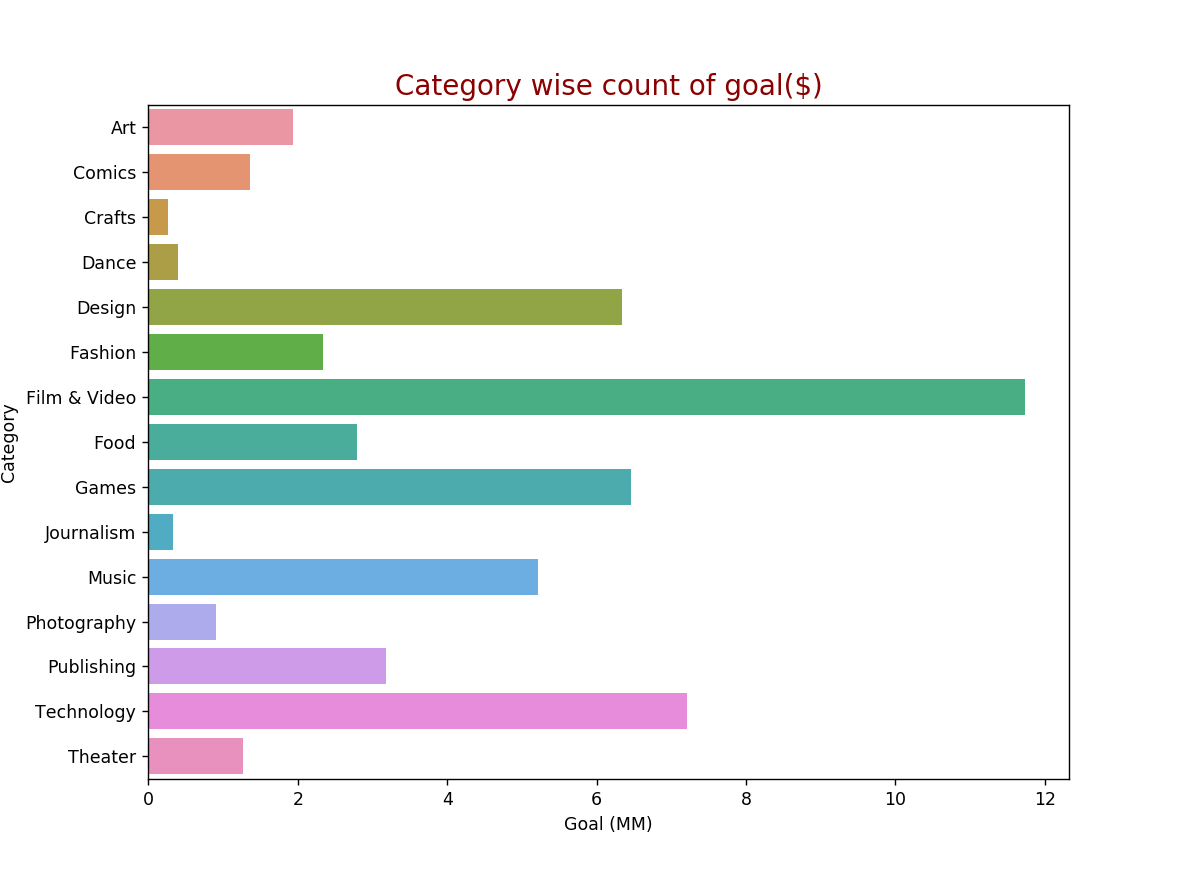

In [107]:
#plot category wise count of goal
plt.figure(figsize = [9.5,7])
sns.barplot(x = 'goal',y = df_category['category_name'], data = df_category)
plt.xlabel('Goal (MM)')
plt.ylabel('Category')
plt.title('Category wise count of goal($)', fontdict = {'color': 'darkred', 'size':16})
plt.show()

<IPython.core.display.Javascript object>


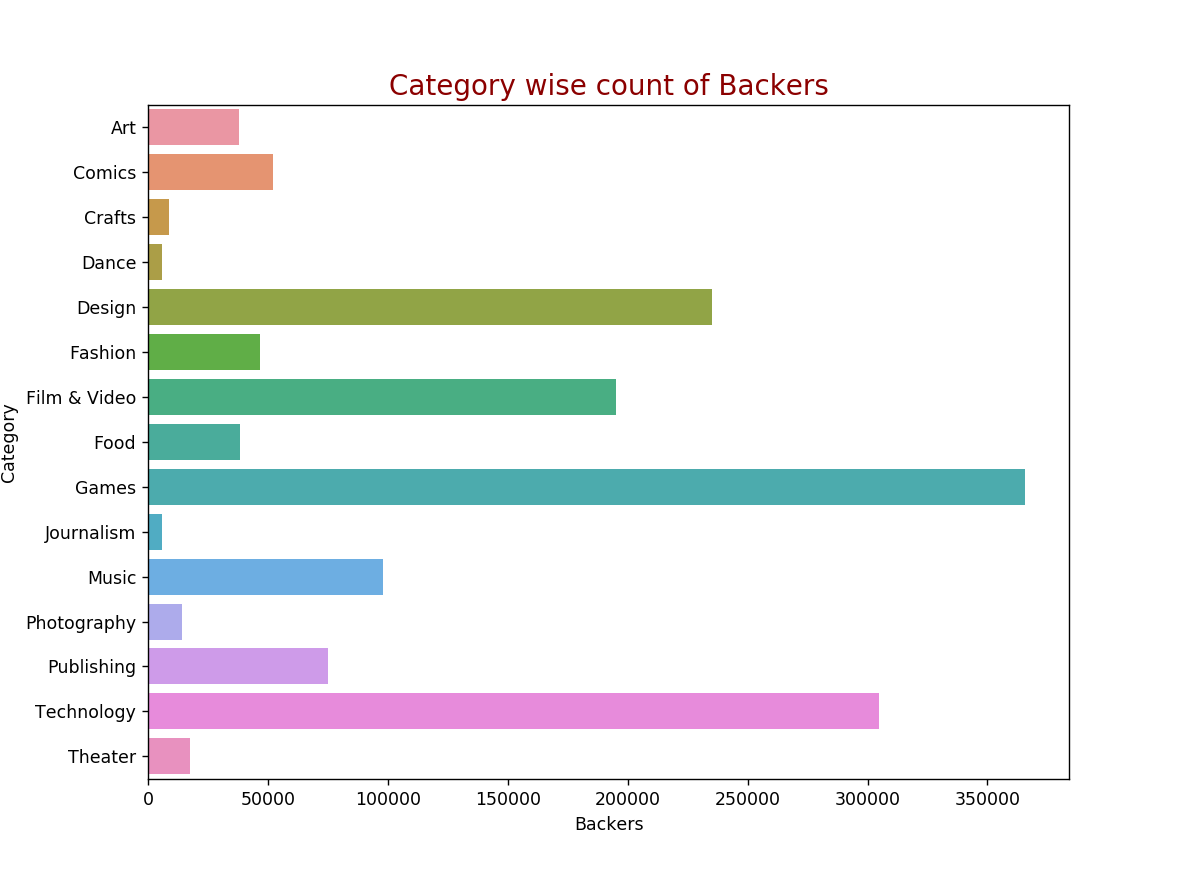

In [119]:
#plot category wise count of backers 
plt.figure(figsize = [9.5,7])
sns.barplot(x = 'backers',y = df_category['category_name'], data = df_category)
plt.xlabel('Backers')
plt.ylabel('Category')
plt.title('Category wise count of Backers', fontdict = {'color': 'darkred', 'size':16})
plt.show()

In [132]:
#keep data only for board game campaigns 
df_board = df_ScsfCamp[df_ScsfCamp.sub_category_name == 'Tabletop Games']


In [134]:
#calculate the campaign length and dvivide by timedelta to change units so that it can be plotted using matplotlib
df_board['camp_length'] = (df_board.deadline - df_board.launched)/pd.Timedelta(days = 1)


C:\Users\sharm.LAPTOP-118C54MT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
#change data type of project_id to cateogory
df_board.project_id = df_board.project_id.astype('category')

C:\Users\sharm.LAPTOP-118C54MT\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<IPython.core.display.Javascript object>


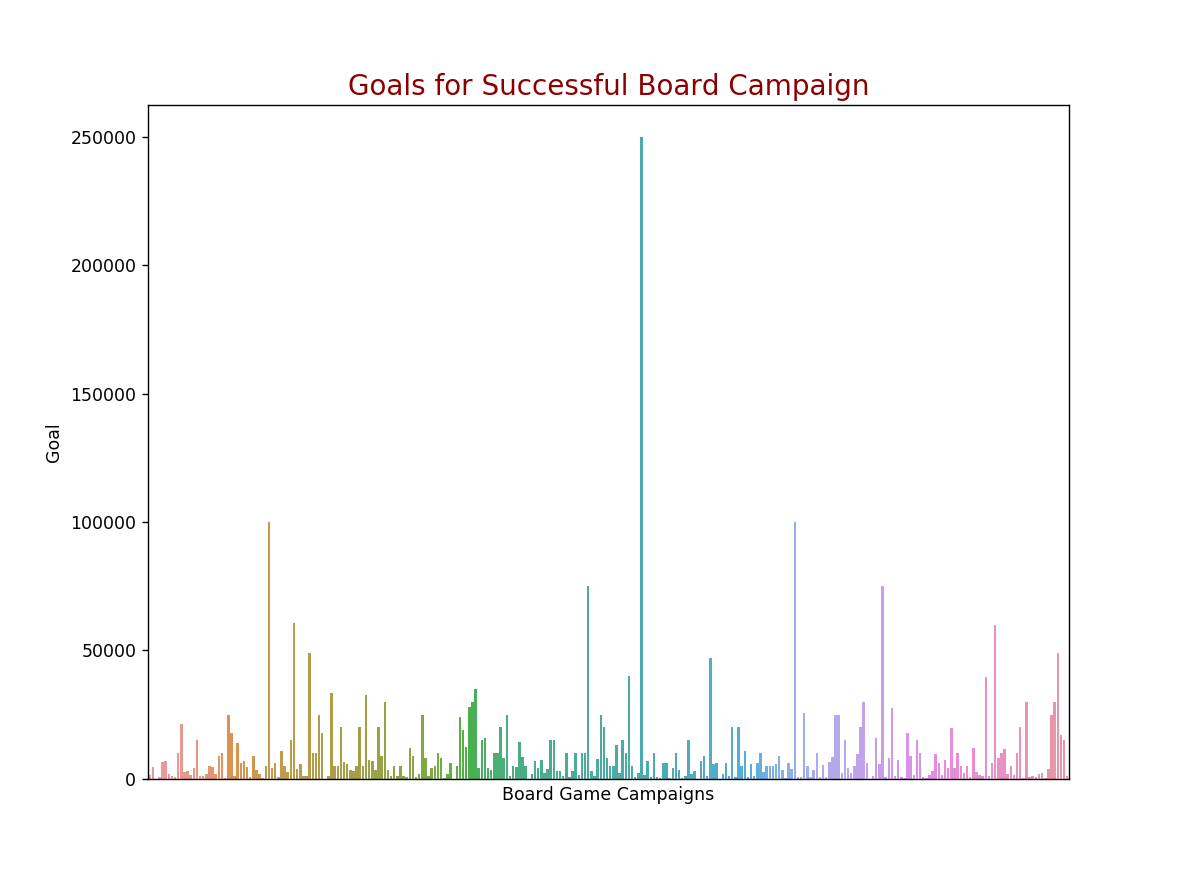

In [148]:
#plot goals for successful board campaigns 
plt.figure(figsize = [9.5,7])
sns.barplot(x="project_id", y="goal", data=df_board)
plt.xlabel('Board Game Campaigns')
plt.xticks([])
plt.ylabel('Goal')
plt.title('Goals for Successful Board Campaign', fontdict = {'color': 'darkred', 'size':16})
plt.show()

<IPython.core.display.Javascript object>


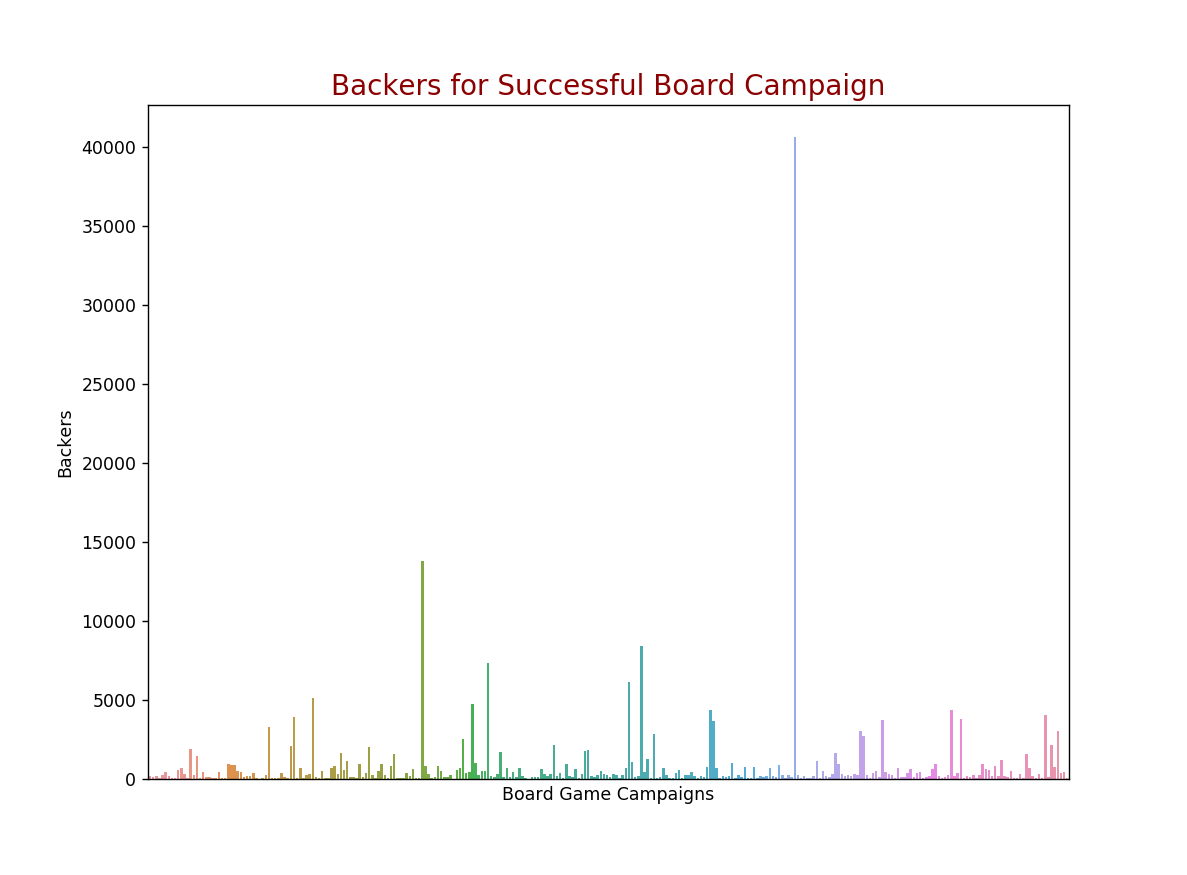

In [149]:
#plot number of backers for successful board campaigns 
plt.figure(figsize = [9.5,7])
sns.barplot(x="project_id", y="backers", data=df_board)
plt.xlabel('Board Game Campaigns')
plt.xticks([])
plt.ylabel('Backers')
plt.title('Backers for Successful Board Campaign', fontdict = {'color': 'darkred', 'size':16})
plt.show()

<IPython.core.display.Javascript object>


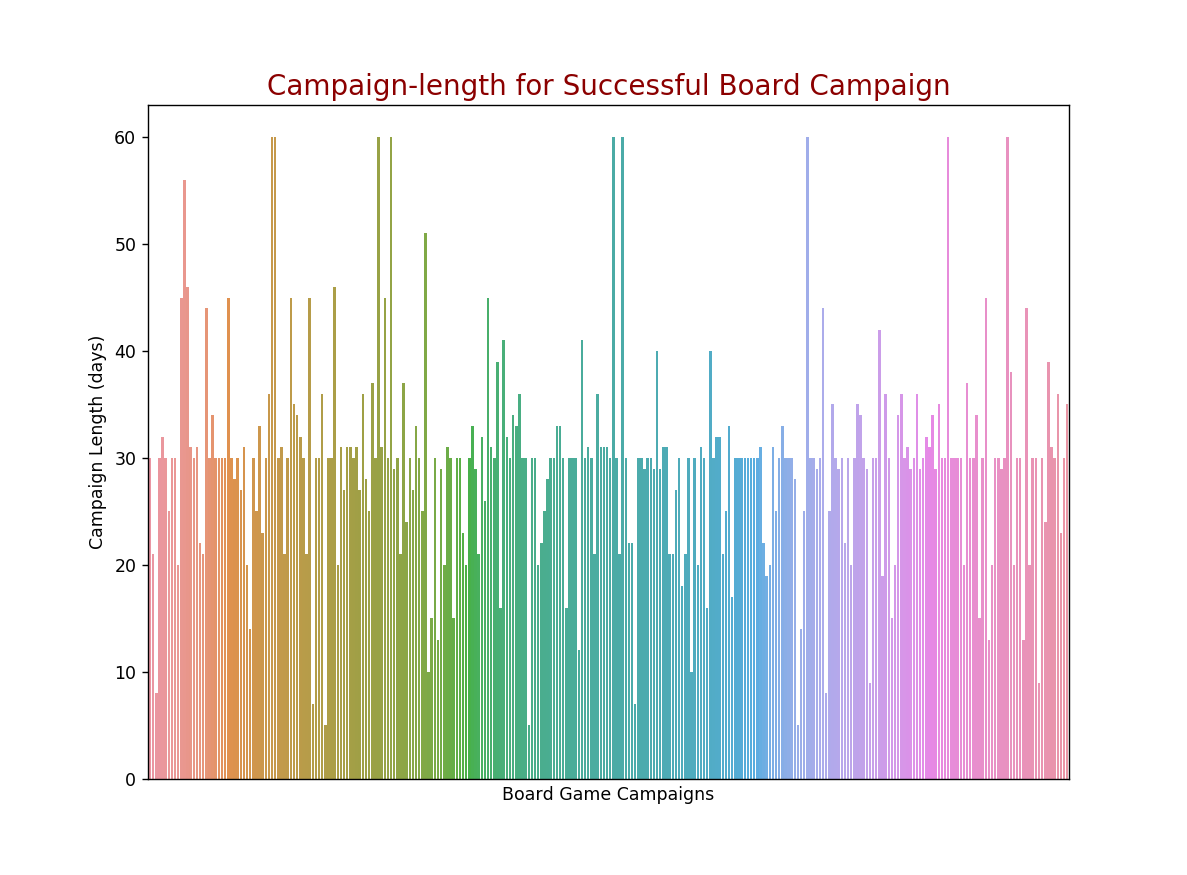

In [150]:
#plot campaign length for successful board campaigns 
plt.figure(figsize = [9.5,7])
sns.barplot(x="project_id", y="camp_length", data=df_board)
plt.xlabel('Board Game Campaigns')
plt.xticks([])
plt.ylabel('Campaign Length (days)')
plt.title('Campaign-length for Successful Board Campaign', fontdict = {'color': 'darkred', 'size':16})
plt.show()

<IPython.core.display.Javascript object>


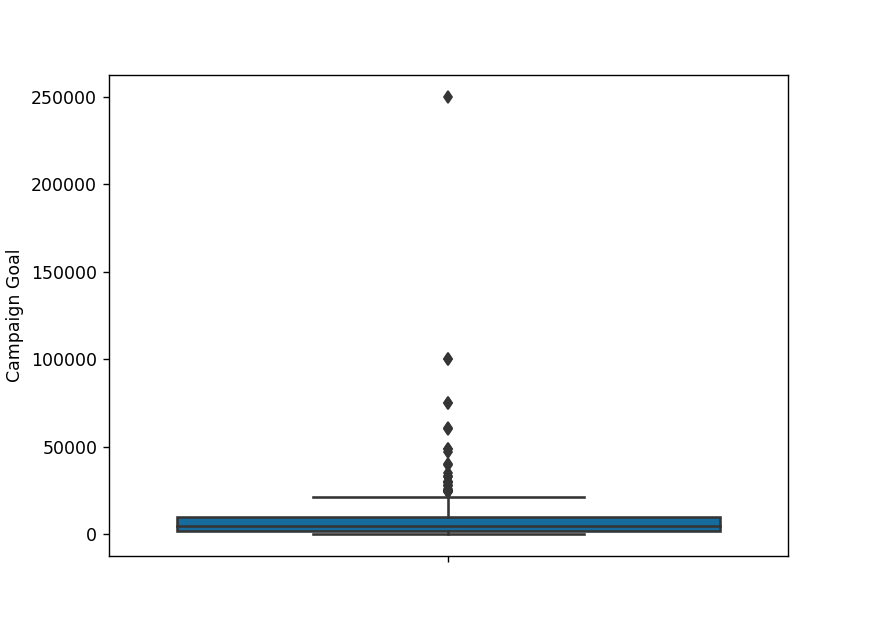

In [145]:
#plot box plot to see the quartiles
plt.figure(figsize = [7,5])
sns.boxplot(x = 'goal', data=df_board, orient="v");
plt.xlabel('')
#plt.xticks([])
plt.ylabel('Campaign Goal')
#plt.title('Category wise count of Backers', fontdict = {'color': 'darkred', 'size':16})
plt.show()


In [155]:
#summary statistics of goals for successful board campaigns 
print(df_board.goal.describe())
print(df_board.backers.describe())
print(df_board.camp_length.describe())

count       294.000000
mean      10258.851497
std       19555.084911
min          10.000000
25%        1688.167500
50%        5000.000000
75%       10000.000000
max      250000.000000
Name: goal, dtype: float64
count      294.000000
mean       785.003401
std       2687.271815
min          8.000000
25%         90.000000
50%        221.500000
75%        605.500000
max      40642.000000
Name: backers, dtype: float64
count    294.000000
mean      29.503401
std        9.434794
min        5.000000
25%       25.250000
50%       30.000000
75%       31.000000
max       60.000000
Name: camp_length, dtype: float64


In [153]:
print(df_board.goal.median())
print(df_board.backers.median())
print(df_board.camp_length.median())

5000.0
221.5
30.0


In [156]:
df_board[df_board.goal == 25000]

,project_id,name,category_id,category_name,sub_category_id,sub_category_name,country_id,country,currency_id,currency,launched,deadline,goal,pledged,backers,outcome,camp_length
1484,1490,Viticulture: The Strategic Game of Winemaking,7,Games,14,Tabletop Games,2,US,2,USD,2012-08-24,2012-10-08,25000.0,65980.72,942,successful,45.0
2788,2800,"Mad About Trivia MOVIES Edition, Board Game",7,Games,14,Tabletop Games,2,US,2,USD,2012-03-16,2012-04-15,25000.0,28083.00,20,successful,30.0
4362,4379,Robot Turtles: The Board Game for Little Progr...,7,Games,14,Tabletop Games,2,US,2,USD,2013-09-03,2013-09-28,25000.0,631230.58,13765,successful,25.0
5497,5519,PIRATE DEN: a pirate-themed bluffing game,7,Games,14,Tabletop Games,2,US,2,USD,2014-03-10,2014-04-11,25000.0,39352.75,697,successful,32.0
10784,10819,"Primo: the beautiful, colorful, mathematical b...",7,Games,14,Tabletop Games,2,US,2,USD,2014-05-08,2014-06-07,25000.0,79744.47,1644,successful,30.0
10824,10859,Darkrock Ventures - Asteroid Mining in Deep Sp...,7,Games,14,Tabletop Games,2,US,2,USD,2015-07-14,2015-08-12,25000.0,56624.00,963,successful,29.0
14720,14766,The Burning Wheel Codex,7,Games,14,Tabletop Games,2,US,2,USD,2016-01-05,2016-02-05,25000.0,108362.00,2109,successful,31.0
